<a href="https://colab.research.google.com/github/hsw1805/ML-DL/blob/main/03_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중회귀

여러 특성을 사용하여 선형 회귀 모델 훈련

여러 특성을 사용하면 차원이 늘어남

- 특성공학이란?
  
  - 기존 특성을 사용하여 새로운 특성을 뽑아내는 작업
  
  - ex_) 길이 특성, 높이 특성으로 길이 * 높이 = 너비 특성 뽑아내기
   

### 데이터 분석 라이브러리로 numpy도 있지만, pandas도 있다.

**pandas 특징**

- 데이터 프래임이라는 판다스의 핵심 데이터 구조로 많은 기능 제공

- np배열로 쉽게 바꿀 수 있음

- csv파일 저장 및 읽어오기 가능



In [19]:
import pandas as pd

df = pd.read_csv("https://bit.ly/perch_csv_data")

perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

### 데이터는 이전 데이터와 동일

In [20]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [21]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

train_input.shape

(42, 3)

###사이킷런의 변환기

데이터의 feature나 전처리 등을 바꿔주는 역할,,?

이거 예제보면 금방 이해 가능!

여기선 PolynomialFeatures 변환기 사용

2,3 데이터를 1,2,3,4,6,9의 6차원 데이터로 변환해주었다

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()

poly.fit([[1,2]])     #여기서는 그냥 차원만 입력해주는 듯?
print(poly.transform([[4,5]]))    #1포함해서 자기자신 제곱과 data의 곱 추가

[[ 1.  4.  5. 16. 20. 25.]]


**왜 1이 추가될까?**

선형 방정식은 a * x1 + b * x2 + c * x3 + ... + d * 1이렇게 되는 구조

절편의 값인 1을 항상 곱해주는 것!

예제

무게 = a * 길이 + b * 높이 + c * 두께 + d * 1

이면 특성은 (길이, 높이, 두께, 1)

하지만 PolynomialFeatures(include_bias=False)로 하게 되면 1은 없어짐

In [23]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [24]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [26]:
test_poly = poly.transform(test_input)

### transform한 data로 선형회귀 하기

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903183436982125

In [28]:
lr.score(test_poly, test_target)

0.9714559911594111

### polynomial에서 degree를 5로 올려 다시 학습시켜보기

In [29]:
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

test_poly = poly.transform(test_input)


### 이 경우 train에서는 높은 점수를 기대할 수 있지만, test에서는 낮은 점수가 나온다

###왜???
- overfitting(과대적합)이 되었기 때문에!

In [30]:
lr1 = LinearRegression()
lr1.fit(train_poly, train_target)
lr1.score(train_poly, train_target)
lr1.score(test_poly, test_target)

-144.40579436844948

### 여러 feature을 쓰고 싶은데,,, 과적합을 피할 방법이 없을까??

### regularizatoin 사용하기!

In [31]:

#standardScaler을 통해 데이터 값을 정규화 시키기
from sklearn.preprocessing import StandardScaler


ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지,라쏘는 선형회귀 + 규제까지 추가한 것

- 릿지
  - 계수를 제곱한 값을 기준으로 규제
- 라쏘
  - 계수의 절댓값을 기준으로 규제

보통 릿지를 선호함

왜?? -> 라쏘는 규제를 통해 계수를 0으로 만들 수 있기 때문에!

## 릿지

In [32]:
#릿지로 정규화하기
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))


0.9896101671037343


In [33]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


### 규제 정도인 alpha값을 적당한 값으로 구해서 해보자

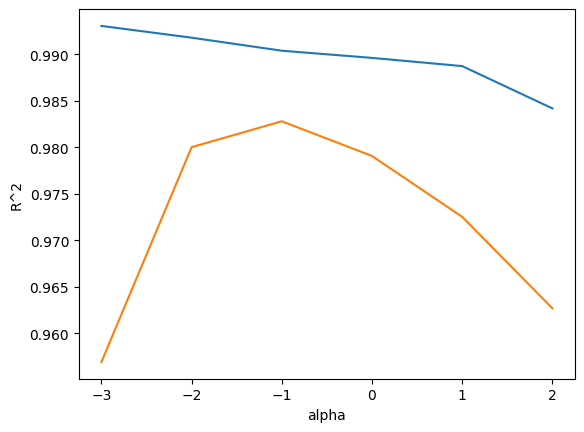

In [34]:
import matplotlib.pyplot as plt

train_score=[]
test_score=[]

alpha_list = [0.001, 0.01, 0.1, 1, 10,100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

## 라쏘

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha= 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [37]:
print(np.sum(lasso.coef_== 0))

40
